# EDA and Data Visualization

While a more robust dashboard will be built in Tableau, we want to continue exploring data while visualizing relationships between features here in Python.

This notebook will be focused on trying to see patterns from player's previous seasons and current season, and their results. The goal for the machine learning of this project is to predict the next season fantasy points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# bringing back in data frames ff_all and ff_collective

starter_df = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_starters_by_year.csv", index_col = 0)
ff_tall = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_collective_filtered.csv", index_col = 0)

qb_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide.csv", index_col = 0)
rb_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide.csv", index_col = 0)
wr_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide.csv", index_col = 0)
te_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide.csv", index_col = 0)

## DataFrame explanation

starter_df contains the players that ranked as in the top 12 as a QB or TE, top 24 as an RB and top 36 as a WR, with a row for each season and each player. 

ff_tall contains players that played in at least 6 games each season AND also scored in the top 50% of all players over all seasons (~33 points). The purpose for these two are for more holistic data analysis and visualization of fantasy.

Each position 'wide' (i.e. rb_wide) contains a row per player that contains their stats from 2019 - 2022. The purpose of this DF is to model off of it and utilize a players previous year's stats to predict how they will do the following season.

In [3]:

pd.set_option('display.max_columns', None)
qb_wide.head()

1std_2019  1std_2020  1std_2021  1std_2022  1std_2023  \
player_name                                                            
AJ McCarron        346.0      326.0      306.0        NaN        NaN   
Aaron Rodgers      320.0      358.0      375.0      334.0        0.0   
Alex McGough       346.0      356.0        NaN        NaN        NaN   
Alex Smith           0.0        0.0        NaN        NaN        NaN   
Alex Tanney        311.0      297.0        NaN        NaN        NaN   

               adp_2019  adp_2020  adp_2021  adp_2022  adp_2023  age_2019  \
player_name                                                                 
AJ McCarron         NaN       NaN       NaN       NaN       NaN       NaN   
Aaron Rodgers      57.0      89.0      67.0      92.0       0.0      36.0   
Alex McGough        NaN       NaN       NaN       NaN       NaN       NaN   
Alex Smith          NaN       NaN       NaN       NaN       NaN      35.0   
Alex Tanney         NaN       NaN       NaN       NaN       NaN      32.0   

               age_2020  age_2021  age_2022  age_2023  aggressiveness_2019  \
player_name                                                                  
AJ McCarron         NaN       NaN       NaN       NaN            16.666667   
Aaron Rodgers      37.0      38.0      39.0      40.0            13.803295   
Alex McGough        NaN       NaN       NaN       NaN             0.000000   
Alex Smith         36.0      37.0      38.0      39.0             0.000000   
Alex Tanney        33.0      34.0      35.0      36.0             0.000000   

               aggressiveness_2020  aggressiveness_2021  aggressiveness_2022  \
player_name                                                                    
AJ McCarron               0.000000             0.000000                  NaN   
Aaron Rodgers            10.579508            16.516486            15.095707   
Alex McGough              0.000000                  NaN                  NaN   
Alex Smith               13.764516                  NaN                  NaN   
Alex Tanney               0.000000                  NaN                  NaN   

               aggressiveness_2023  attempts_2019  attempts_2020  \
player_name                                                        
AJ McCarron                    NaN      36.000000       0.000000   
Aaron Rodgers                  0.0      66.941176      61.882353   
Alex McGough                   NaN       0.000000       0.000000   
Alex Smith                     NaN       0.000000      56.000000   
Alex Tanney                    NaN       0.000000       0.000000   

               attempts_2021  attempts_2022  attempts_2023  \
player_name                                                  
AJ McCarron         0.000000            NaN            NaN   
Aaron Rodgers      62.470588      60.222222            0.0   
Alex McGough             NaN            NaN            NaN   
Alex Smith               NaN            NaN            NaN   
Alex Tanney              NaN            NaN            NaN   

               avg_air_distance_2019  avg_air_distance_2020  \
player_name                                                   
AJ McCarron                20.992778               0.000000   
Aaron Rodgers              23.003235              22.344334   
Alex McGough                0.000000               0.000000   
Alex Smith                  0.000000              18.412256   
Alex Tanney                 0.000000               0.000000   

               avg_air_distance_2021  avg_air_distance_2022  \
player_name                                                   
AJ McCarron                 0.000000                    NaN   
Aaron Rodgers              21.579879              21.550354   
Alex McGough                     NaN                    NaN   
Alex Smith                       NaN                    NaN   
Alex Tanney                      NaN                    NaN   

               avg_air_distance_2023  avg_air_yards_differential_2

In [4]:
# let's create lists of column names to easily see things we'd like to see in dataframes

scoring_by_year = ['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020',
                   'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

In [5]:
ff_tall.head()

team       player_name position player_id_x  height  weight  years_exp  \
1   ARI      Kyler Murray       QB  00-0035228    70.0   207.0        0.0   
4   ARI     David Johnson       RB  00-0032187    73.0   224.0        4.0   
5   ARI      Kenyan Drake       RB  00-0033118    73.0   211.0        3.0   
8   ARI     Chase Edmonds       RB  00-0034681    69.0   210.0        1.0   
14  ARI  Larry Fitzgerald       WR  00-0022921    75.0   218.0       15.0   

     tm pos   age     g    gs    tgt   rec  passingyds  passingtd  passingatt  \
1   ARI  QB  22.0  16.0  16.0    0.0   0.0      3722.0       20.0       542.0   
4   ARI  RB  28.0  13.0   9.0   47.0  36.0         0.0        0.0         0.0   
5   2TM  RB  25.0  14.0  10.0   68.0  50.0         0.0        0.0         0.0   
8   ARI  RB  23.0  13.0   2.0   21.0  12.0         0.0        0.0         0.0   
14  ARI  WR  36.0  16.0  16.0  109.0  75.0         0.0        0.0         0.0   

    rushingyds  rushingtd  rushingatt  receivingyds  receivingtd  \
1        544.0        4.0        93.0           0.0          0.0   
4        345.0        2.0        94.0         370.0          4.0   
5        817.0        8.0       170.0         345.0          0.0   
8        303.0        4.0        60.0         105.0          1.0   
14         0.0        0.0         0.0         804.0          4.0   

    fantasypoints   int  fumbles  fumbleslost    adp              name  \
1          279.28  12.0      5.0          2.0  114.0      Kyler Murray   
4          141.50   0.0      1.0          1.0    5.0     David Johnson   
5          212.20   0.0      2.0          1.0   89.0      Kenyan Drake   
8           82.80   0.0      0.0          0.0    NaN               NaN   
14         177.40   0.0      1.0          1.0  116.0  Larry Fitzgerald   

    season  cmp  ppr  dkpt  fdpt  vbd team_abb  player_id_y  qbr_total  \
1     2019  NaN  NaN   NaN   NaN  NaN      ARI    3917315.0       57.7   
4     2019  NaN  NaN   NaN   NaN  NaN      NaN          NaN        NaN   
5     2019  NaN  NaN   NaN   NaN  NaN      NaN          NaN        NaN   
8     2019  NaN  NaN   NaN   NaN  NaN      NaN          NaN        NaN   
14    2019  NaN  NaN   NaN   NaN  NaN      NaN          NaN        NaN   

    pts_added  qb_plays  epa_total  pass   run  exp_sack  qbr_raw  sack  \
1        16.2     709.0       71.6  37.3  13.4       0.0     58.0 -17.8   
4         NaN       NaN        NaN   NaN   NaN       NaN      NaN   NaN   
5         NaN       NaN        NaN   NaN   NaN       NaN      NaN   NaN   
8         NaN       NaN        NaN   NaN   NaN       NaN      NaN   NaN   
14        NaN       NaN        NaN   NaN   NaN       NaN      NaN   NaN   

    name_display player_display_name player_gsis_id_x  avg_time_to_throw  \
1   Kyler Murray        Kyler Murray       00-0035228           2.733681   
4            NaN       David Johnson              NaN                NaN   
5            NaN        Kenyan Drake              NaN                NaN   
8            NaN       Chase Edmonds              NaN                NaN   
14           NaN    Larry Fitzgerald              NaN                NaN   

    avg_completed_air_yards  avg_intended_air_yards  \
1                  4.914236                6.850385   
4                       NaN                     NaN   
5                       NaN                     NaN   
8                       NaN                     NaN   
14                      NaN                7.479945   

    avg_air_yards_differential  aggressiveness  max_completed_air_distance  \
1                    -1.936149       13.732432                    38.64734   
4                          NaN             NaN                         NaN   
5                          NaN             NaN                         NaN   
8                          NaN             NaN                         NaN   
14                         NaN             NaN                         NaN   

    avg_air_yards_to_sticks   attempts  pass_y

### Scoring and positions as a whole

In [6]:
pd.set_option('display.max_columns', None)
starter_df.head()

team     player_name position player_id_x  height  weight  years_exp   tm  \
0  BAL   Lamar Jackson       QB  00-0034796    74.0   212.0        1.0  BAL   
1  DAL    Dak Prescott       QB  00-0033077    74.0   238.0        3.0  DAL   
2  SEA  Russell Wilson       QB  00-0029263    71.0   215.0        7.0  SEA   
3  HOU  Deshaun Watson       QB  00-0033537    74.0   221.0        2.0  HOU   
4   TB  Jameis Winston       QB  00-0031503    76.0   231.0        4.0  TAM   

  pos   age     g    gs  tgt  rec  passingyds  passingtd  passingatt  \
0  QB  22.0  15.0  15.0  0.0  0.0      3127.0       36.0       401.0   
1  QB  26.0  16.0  16.0  0.0  0.0      4902.0       30.0       596.0   
2  QB  31.0  16.0  16.0  0.0  0.0      4110.0       31.0       516.0   
3  QB  24.0  15.0  15.0  1.0  1.0      3852.0       26.0       495.0   
4  QB  25.0  16.0  16.0  0.0  0.0      5109.0       33.0       626.0   

   rushingyds  rushingtd  rushingatt  receivingyds  receivingtd  \
0      1206.0        7.0       176.0           0.0          0.0   
1       277.0        3.0        52.0           0.0          0.0   
2       342.0        3.0        75.0           0.0          0.0   
3       413.0        7.0        82.0           6.0          1.0   
4       250.0        1.0        59.0           0.0          0.0   

   fantasypoints   int  fumbles  fumbleslost    adp            name  season  \
0         415.68   6.0      9.0          2.0   98.0   Lamar Jackson    2019   
1         335.78  11.0      6.0          2.0  131.0    Dak Prescott    2019   
2         326.60   5.0      8.0          2.0   93.0  Russell Wilson    2019   
3         318.98  12.0     10.0          3.0   48.0  Deshaun Watson    2019   
4         297.36  30.0     12.0          5.0  111.0  Jameis Winston    2019   

   cmp  ppr  dkpt  fdpt  vbd team_abb  player_id_y  qbr_total  pts_added  \
0  NaN  NaN   NaN   NaN  NaN      BAL    3916387.0       83.0       66.7   
1  NaN  NaN   NaN   NaN  NaN      DAL    2577417.0       71.9       48.1   
2  NaN  NaN   NaN   NaN  NaN      SEA      14881.0       71.5       43.0   
3  NaN  NaN   NaN   NaN  NaN      HOU    3122840.0       70.5       42.3   
4  NaN  NaN   NaN   NaN  NaN       TB    2969939.0       55.7       20.1   

   qb_plays  epa_total  pass   run  exp_sack  qbr_raw  sack    name_display  \
0     613.0      103.7  55.0  39.1       0.0     82.3  -7.4   Lamar Jackson   
1     690.0       93.1  70.7  10.0       0.0     72.8  -9.7    Dak Prescott   
2     674.0       90.9  58.3  10.6       0.0     71.2 -20.6  Russell Wilson   
3     662.0       91.6  52.0  19.8       0.0     71.2 -18.5  Deshaun Watson   
4     772.0       78.4  48.7   9.0       0.0     59.1 -18.3  Jameis Winston   

  player_display_name player_gsis_id_x  avg_time_to_throw  \
0       Lamar Jackson       00-0034796           2.943613   
1        Dak Prescott       00-0033077           2.863889   
2      Russell Wilson       00-0029263           2.857214   
3      Deshaun Watson       00-0033537           2.811673   
4      Jameis Winston       00-0031503           2.773831   

   avg_completed_air_yards  avg_intended_air_yards  \
0                 6.721439                8.814669   
1                 7.383088                9.074466   
2                 6.919418                9.558971   
3                 6.598724                8.822830   
4                 8.317304               10.508673   

   avg_air_yards_differential  aggressiveness  max_completed_air_distance  \
0                   -2.093231       14.902159                   38.032465   
1                   -1.691378       17.214539                   41.775767   
2                   -2.639553       19.070277                   43.704954   
3                   -2.224106       15.675721                   43.954208   
4                   -2.191370       17.202558                   43.811773   

   avg_air_yards_to_sticks   attempts  pass_yards  pass_touchdowns  \
0                 0.242468  50.125000  390.875000         4

In [7]:
starter_df.describe()

height     weight   years_exp         age           g          gs  \
count  336.000000  336.00000  336.000000  336.000000  336.000000  336.000000   
mean    73.184524  216.21131    3.961310   26.184524   15.449405   13.604167   
std      2.692477   21.17292    3.460005    3.675071    1.446705    3.448709   
min     67.000000  165.00000    0.000000   21.000000    8.000000    0.000000   
25%     71.000000  202.00000    2.000000   24.000000   15.000000   12.000000   
50%     73.000000  215.00000    3.000000   26.000000   16.000000   15.000000   
75%     75.250000  228.00000    5.000000   27.000000   16.000000   16.000000   
max     79.000000  265.00000   22.000000   45.000000   17.000000   17.000000   

              tgt         rec   passingyds   passingtd  passingatt  \
count  336.000000  336.000000   336.000000  336.000000  336.000000   
mean    82.458333   56.910714   603.979167    4.395833   80.342262   
std     48.947411   33.026237  1492.923722   11.031617  198.971982   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%     48.750000   36.000000     0.000000    0.000000    0.000000   
50%     89.000000   60.000000     0.000000    0.000000    0.000000   
75%    119.000000   78.250000     0.000000    0.000000    1.000000   
max    191.000000  149.000000  5316.000000   48.000000  733.000000   

        rushingyds   rushingtd  rushingatt  receivingyds  receivingtd  \
count   336.000000  336.000000  336.000000    336.000000   336.000000   
mean    340.860119    3.029762   73.845238    660.660714     4.354167   
std     459.361557    4.293592   99.120309    448.399007     3.596372   
min     -11.000000    0.000000    0.000000    -10.000000     0.000000   
25%       0.000000    0.000000    1.000000    287.000000     1.000000   
50%      41.500000    0.500000    7.000000    719.000000     4.000000   
75%     762.250000    6.000000  160.500000   1023.750000     7.000000   
max    2027.000000   18.000000  378.000000   1947.000000    18.000000   

       fantasypoints         int     fumbles  fumbleslost         adp  \
count     336.000000  336.000000  336.000000   336.000000  284.000000   
mean      196.181012    1.491071    2.282738     1.107143   61.221831   
std        76.716246    3.982039    2.954450     1.397378   46.414061   
min        80.000000    0.000000    0.000000     0.000000    1.000000   
25%       137.000000    0.000000    0.000000     0.000000   23.750000   
50%       180.000000    0.000000    1.000000     1.000000   51.000000   
75%       242.250000    0.000000    3.000000     2.000000   89.000000   
max       469.200000   30.000000   16.000000     9.000000  198.000000   

          season         cmp         ppr        dkpt        fdpt         vbd  \
count   420.0000   84.000000   84.000000   84.000000   84.000000   66.000000   
mean   2021.0000   54.785714  236.686905  243.579762  209.746429   48.454545   
std       1.4159  137.571280   66.676558   69.674939   72.123037   39.112926   
min    2019.0000    0.000000  134.800000  137.800000  113.700000    1.000000   
25%    2020.0000    0.000000  180.600000  186.600000  153.700000   17.250000   
50%    2021.0000    0.000000  224.450000  229.650000  189.650000   37.000000   
75%    2022.0000    0.000000  284.075000  298.800000  261.625000   72.750000   
max    2023.0000  490.000000  417.400000  435.400000  428.900000  136.000000   

        player_id_y  qbr_total  pts_added    qb_plays   epa_total        pass  \
count  4.900000e+01  49.000000  49.000000   49.000000   49.000000   49.000000   
mean   2.268053e+06  64.720408  32.269388  686.693878   89.187755   68.918367   
std    1.795562e+06   9.874314  21.880006  107.102794   21.717558   24.828383   
min    2.330000e+03  48.500000  -3.800000  118.000000   20.000000    4.400000   
25%    1.488000e+04  55.900000  14.100000  642.000000   76.900000   54.700000   
50%    3.122840e+06  63.200000  29.400000  691.000000   90.500000   68.200000   
75%    3.917315e+06  71.500000  47.500000  746.000000  

In [8]:
qb_wide.head()

1std_2019  1std_2020  1std_2021  1std_2022  1std_2023  \
player_name                                                            
AJ McCarron        346.0      326.0      306.0        NaN        NaN   
Aaron Rodgers      320.0      358.0      375.0      334.0        0.0   
Alex McGough       346.0      356.0        NaN        NaN        NaN   
Alex Smith           0.0        0.0        NaN        NaN        NaN   
Alex Tanney        311.0      297.0        NaN        NaN        NaN   

               adp_2019  adp_2020  adp_2021  adp_2022  adp_2023  age_2019  \
player_name                                                                 
AJ McCarron         NaN       NaN       NaN       NaN       NaN       NaN   
Aaron Rodgers      57.0      89.0      67.0      92.0       0.0      36.0   
Alex McGough        NaN       NaN       NaN       NaN       NaN       NaN   
Alex Smith          NaN       NaN       NaN       NaN       NaN      35.0   
Alex Tanney         NaN       NaN       NaN       NaN       NaN      32.0   

               age_2020  age_2021  age_2022  age_2023  aggressiveness_2019  \
player_name                                                                  
AJ McCarron         NaN       NaN       NaN       NaN            16.666667   
Aaron Rodgers      37.0      38.0      39.0      40.0            13.803295   
Alex McGough        NaN       NaN       NaN       NaN             0.000000   
Alex Smith         36.0      37.0      38.0      39.0             0.000000   
Alex Tanney        33.0      34.0      35.0      36.0             0.000000   

               aggressiveness_2020  aggressiveness_2021  aggressiveness_2022  \
player_name                                                                    
AJ McCarron               0.000000             0.000000                  NaN   
Aaron Rodgers            10.579508            16.516486            15.095707   
Alex McGough              0.000000                  NaN                  NaN   
Alex Smith               13.764516                  NaN                  NaN   
Alex Tanney               0.000000                  NaN                  NaN   

               aggressiveness_2023  attempts_2019  attempts_2020  \
player_name                                                        
AJ McCarron                    NaN      36.000000       0.000000   
Aaron Rodgers                  0.0      66.941176      61.882353   
Alex McGough                   NaN       0.000000       0.000000   
Alex Smith                     NaN       0.000000      56.000000   
Alex Tanney                    NaN       0.000000       0.000000   

               attempts_2021  attempts_2022  attempts_2023  \
player_name                                                  
AJ McCarron         0.000000            NaN            NaN   
Aaron Rodgers      62.470588      60.222222            0.0   
Alex McGough             NaN            NaN            NaN   
Alex Smith               NaN            NaN            NaN   
Alex Tanney              NaN            NaN            NaN   

               avg_air_distance_2019  avg_air_distance_2020  \
player_name                                                   
AJ McCarron                20.992778               0.000000   
Aaron Rodgers              23.003235              22.344334   
Alex McGough                0.000000               0.000000   
Alex Smith                  0.000000              18.412256   
Alex Tanney                 0.000000               0.000000   

               avg_air_distance_2021  avg_air_distance_2022  \
player_name                                                   
AJ McCarron                 0.000000                    NaN   
Aaron Rodgers              21.579879              21.550354   
Alex McGough                     NaN                    NaN   
Alex Smith                       NaN                    NaN   
Alex Tanney                      NaN                    NaN   

               avg_air_distance_2023  avg_air_yards_differential_2

## Each position, year over year

### QBs

In [9]:
qb_wide.shape

(178, 520)

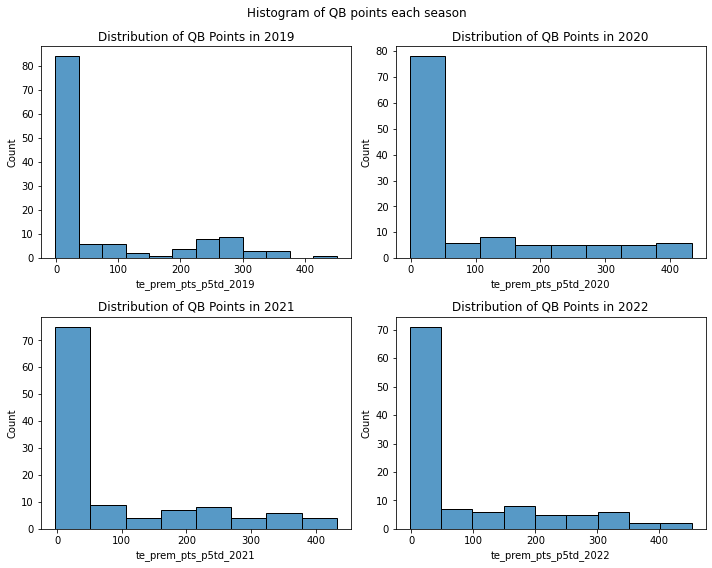

In [10]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Histogram of QB points each season')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(x=f'te_prem_pts_p5td_{year}',data= qb_wide, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of QB Points in {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [11]:
# can we cut this data down to a relevant top percentile?

qb_wide[scoring_by_year].quantile([ .3, .4, .5, .6, .67,.7, .75, .8])

te_prem_pts_p5td_2019  te_prem_pts_p5td_2020  te_prem_pts_p5td_2021  \
0.30                 0.0000                 0.0000                  0.000   
0.40                 0.0000                 1.2480                  0.360   
0.50                 0.0000                 9.2700                 10.880   
0.60                11.1000                20.2000                 29.840   
0.67                41.8984                56.0962                 73.248   
0.70                60.6240                70.7640                 88.232   
0.75                96.0800               140.8000                156.860   
0.80               212.5600               188.1000                203.384   

      te_prem_pts_p5td_2022  
0.30                 0.0000  
0.40                 7.9200  
0.50                17.8300  
0.60                41.5000  
0.67                66.9088  
0.70               101.0900  
0.75               136.7800  
0.80               181.8200

In [12]:
# because of nature of the data, let's see how many are null as well

qb_wide[scoring_by_year].isna().sum()

te_prem_pts_p5td_2019    51
te_prem_pts_p5td_2020    60
te_prem_pts_p5td_2021    61
te_prem_pts_p5td_2022    66
dtype: int64

Based on how many rows and then nulls, seems there are anywhere from 113 - 130 qbs per season that are in here.

We can definitely trim this down. Let's take, about the top 3rd -- that is, they have to be about in the top 3rd fantasy pts scored at least for one of these seasons to be eligible.

In [13]:
# let's filter out QBs a bit further

# because of nature of the data, let's see how many are null as well

qb_filtered = qb_wide.loc[(qb_wide['te_prem_pts_p5td_2019'] >= 41.97 )| (qb_wide['te_prem_pts_p5td_2020'] >= 56.132) | \
                     (qb_wide['te_prem_pts_p5td_2021'] >= 71.34) |  (qb_wide['te_prem_pts_p5td_2022'] >= 62.21) ]

In [14]:
print('nulls of qb_filtered now: ', 
      qb_filtered[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum(),
     'Shape of qb_filtered: ',
     qb_filtered.shape)

nulls of qb_filtered now:  te_prem_pts_p5td_2019    12
te_prem_pts_p5td_2020    10
te_prem_pts_p5td_2021     7
te_prem_pts_p5td_2022    11
dtype: int64 Shape of qb_filtered:  (65, 520)


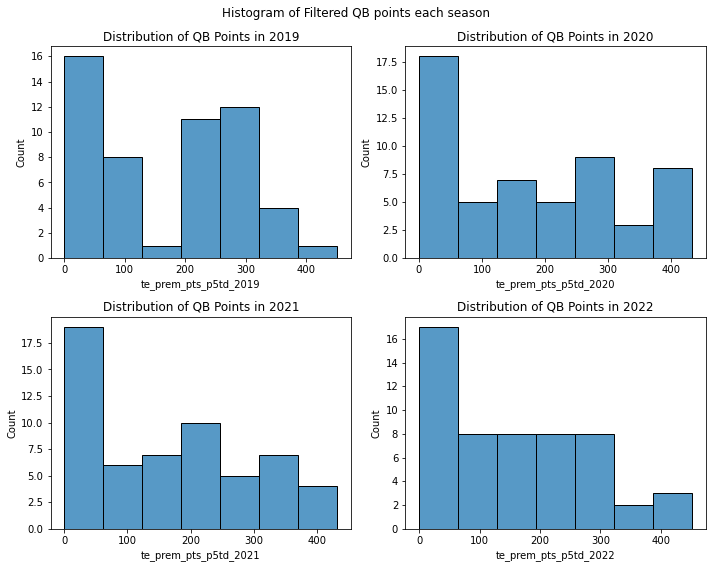

In [15]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Histogram of Filtered QB points each season')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(x=f'te_prem_pts_p5td_{year}',data= qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of QB Points in {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

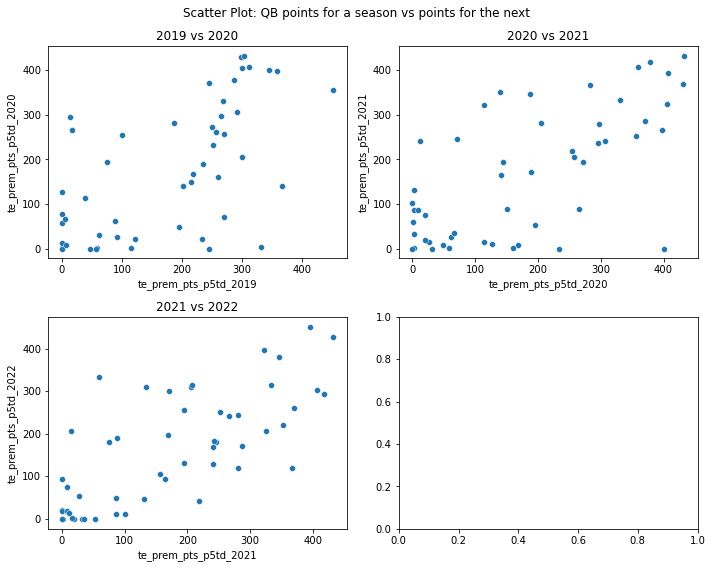

In [16]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: QB points for a season vs points for the next')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data= qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

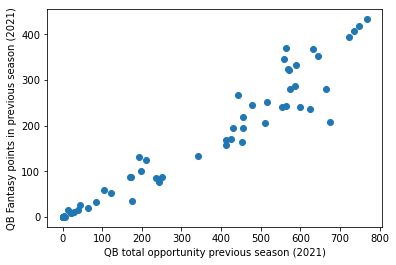

In [17]:
plt.scatter(qb_filtered['ttl_opp_2021'], qb_filtered['te_prem_pts_p5td_2021'])
plt.xlabel('QB total opportunity previous season (2021)')
plt.ylabel('QB Fantasy points in previous season (2021)')

plt.show()

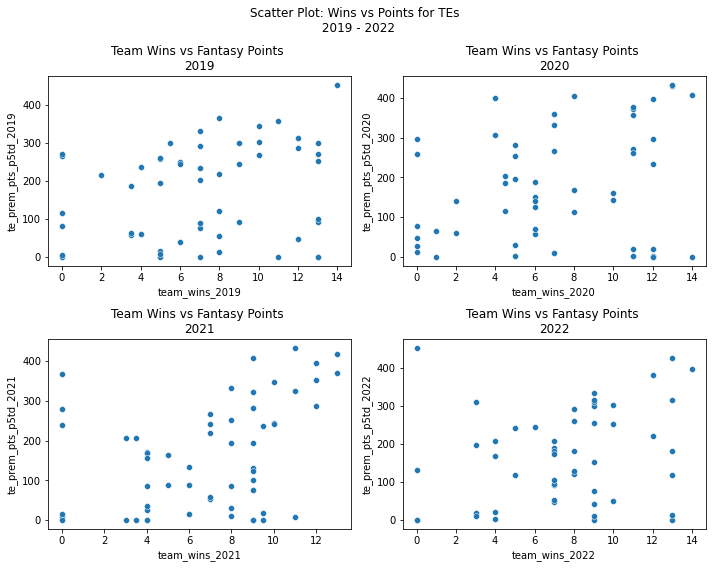

In [18]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Wins vs Points for TEs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'team_wins_{year}', y=f'te_prem_pts_p5td_{year}', data=qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Team Wins vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

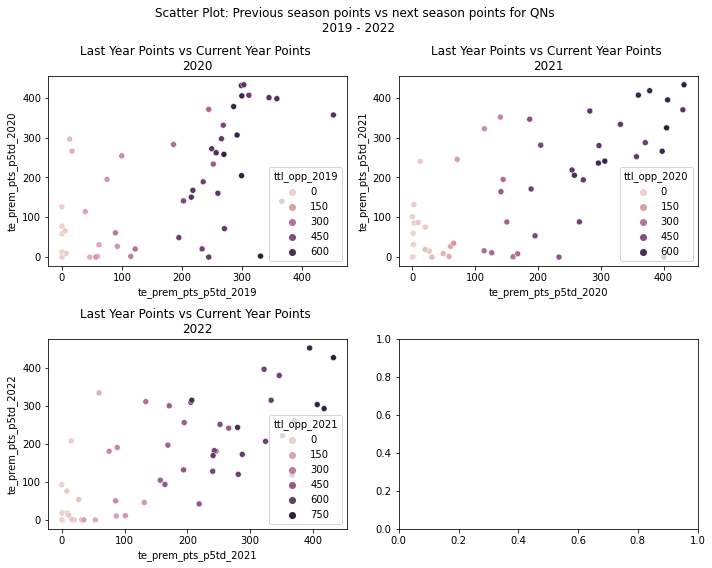

In [19]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Previous season points vs next season points for QNs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', hue = f'ttl_opp_{year}', data=qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Last Year Points vs Current Year Points \n{next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

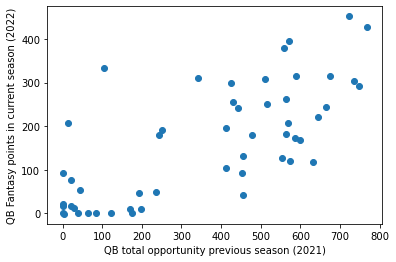

In [20]:
# how does previous amount of touches in previous year reflect next year's points?

plt.scatter(qb_filtered['ttl_opp_2021'], qb_filtered['te_prem_pts_p5td_2022'])
plt.xlabel('QB total opportunity previous season (2021)')
plt.ylabel('QB Fantasy points in current season (2022)')

plt.show()

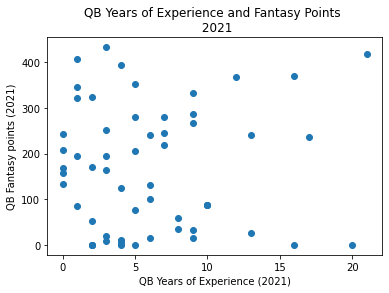

In [21]:
plt.scatter(qb_filtered['years_exp_2021'], qb_filtered['te_prem_pts_p5td_2021'] )
plt.xlabel('QB Years of Experience (2021)')
plt.ylabel('QB Fantasy points (2021)')
plt.title('QB Years of Experience and Fantasy Points \n 2021')

plt.show()

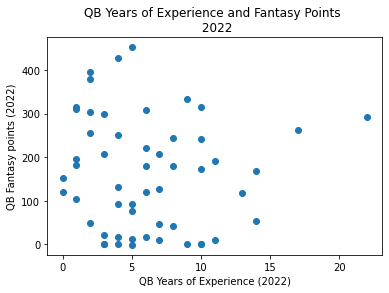

In [22]:
plt.scatter(qb_filtered['years_exp_2022'], qb_filtered['te_prem_pts_p5td_2022'] )
plt.xlabel('QB Years of Experience (2022)')
plt.ylabel('QB Fantasy points (2022)')
plt.title('QB Years of Experience and Fantasy Points \n 2022')

plt.show()

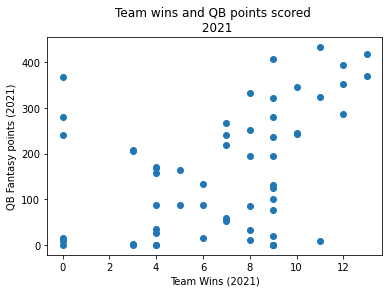

In [23]:
plt.scatter(qb_filtered['wins_2021'], qb_filtered['te_prem_pts_p5td_2021'] )
plt.xlabel('Team Wins (2021)')
plt.ylabel('QB Fantasy points (2021)')
plt.title('Team wins and QB points scored \n 2021')

plt.show()

<AxesSubplot:>

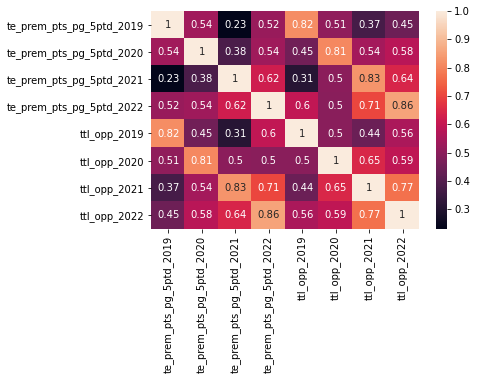

In [24]:
# let's check correlation between a few of these

sns.heatmap(qb_filtered[['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020', 'te_prem_pts_pg_5ptd_2021'\
                     , 'te_prem_pts_pg_5ptd_2022', 'ttl_opp_2019','ttl_opp_2020', 'ttl_opp_2021', 'ttl_opp_2022']]\
            .corr(), annot = True)

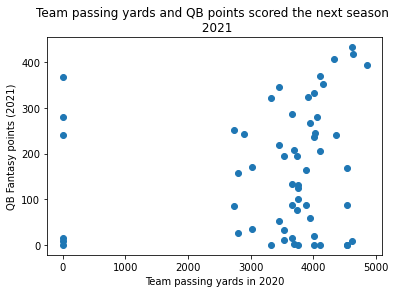

In [25]:
plt.scatter(qb_filtered['passy_last_yr_tm_stat_2021'], qb_filtered['te_prem_pts_p5td_2021'] )
plt.xlabel('Team passing yards in 2020')
plt.ylabel('QB Fantasy points (2021)')
plt.title('Team passing yards and QB points scored the next season \n 2021')

plt.show()

<AxesSubplot:>

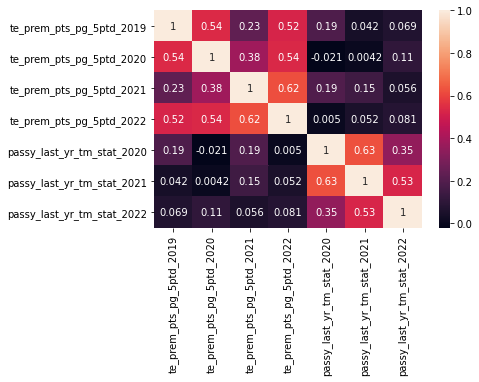

In [26]:
# let's check correlation between a few of these

sns.heatmap(qb_filtered[['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020', 'te_prem_pts_pg_5ptd_2021'\
                     , 'te_prem_pts_pg_5ptd_2022', 'passy_last_yr_tm_stat_2020','passy_last_yr_tm_stat_2021', 'passy_last_yr_tm_stat_2022']]\
            .corr(), annot = True)

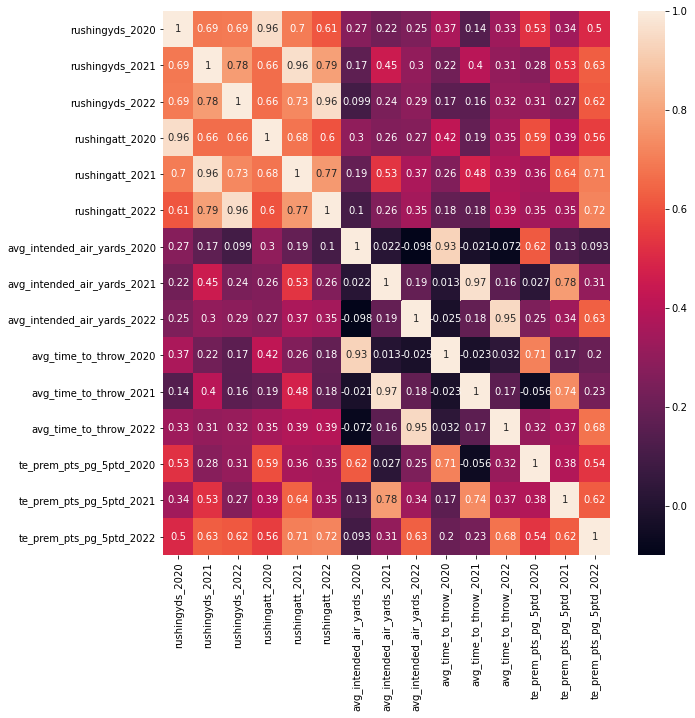

In [27]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(qb_filtered[['rushingyds_2020', 'rushingyds_2021', 'rushingyds_2022',
                     'rushingatt_2020', 'rushingatt_2021', 'rushingatt_2022',
                   'avg_intended_air_yards_2020', 'avg_intended_air_yards_2021',
                   'avg_intended_air_yards_2022', 'avg_time_to_throw_2020' , 'avg_time_to_throw_2021', 
                   'avg_time_to_throw_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

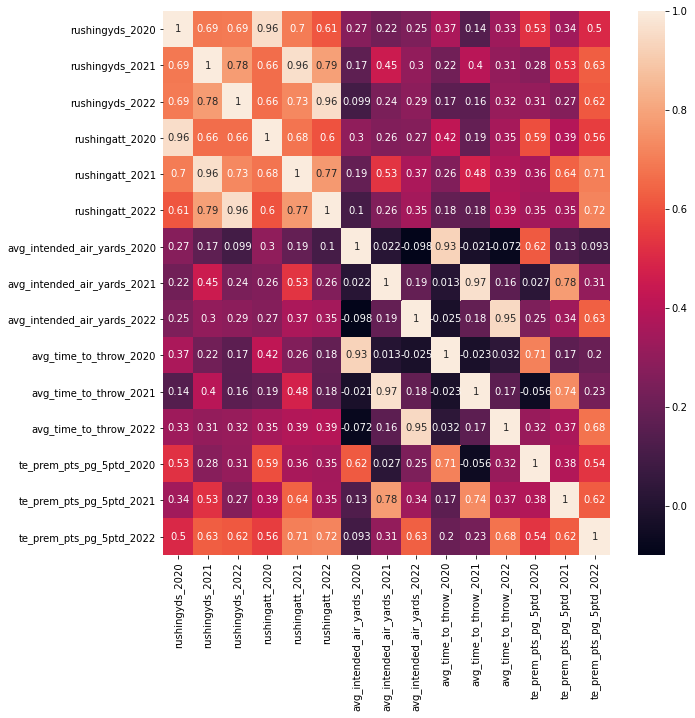

In [28]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(qb_filtered[['rushingyds_2020', 'rushingyds_2021', 'rushingyds_2022',
                     'rushingatt_2020', 'rushingatt_2021', 'rushingatt_2022',
                   'avg_intended_air_yards_2020', 'avg_intended_air_yards_2021',
                   'avg_intended_air_yards_2022', 'avg_time_to_throw_2020' , 'avg_time_to_throw_2021', 
                   'avg_time_to_throw_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

For QBs, past success seems to be indicitive of future success - even scores from 3 years ago all give a moderately high correlation to points (.64 for 2019 to 2022, .66 for 2020 to 2022, and .72 for the following year). Opportunities and points per game all are fairly high. Also, stats like rushing yards, as expected, have a moderate to strong correlation with points, even year over year for following years. Interestingly, though, attempts has a higher correlation with points. Intended air yards definitely have an impact in-year on points, but not as strong year over year. Same with time to throw.

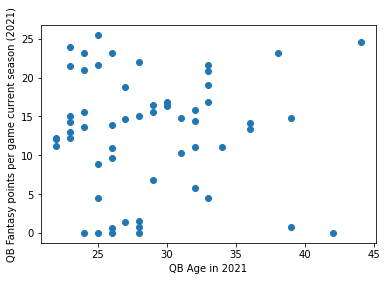

In [29]:
plt.scatter(qb_filtered['age_2021'], qb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB Age in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

plt.show()


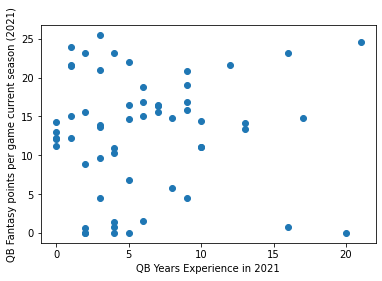

In [30]:
plt.scatter(qb_filtered['years_exp_2021'], qb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB Years Experience in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

plt.show()

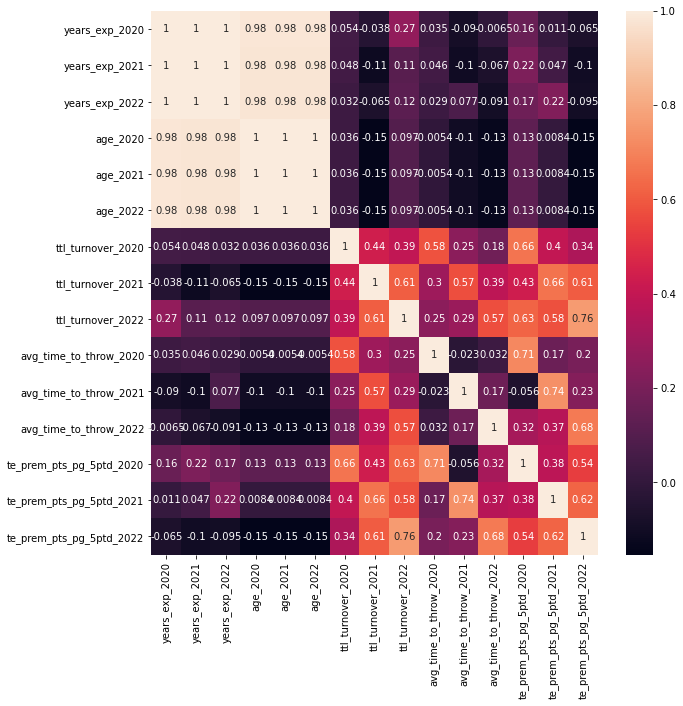

In [31]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(qb_filtered[['years_exp_2020', 'years_exp_2021', 'years_exp_2022',
                     'age_2020', 'age_2021', 'age_2022',
                   'ttl_turnover_2020', 'ttl_turnover_2021',
                   'ttl_turnover_2022', 'avg_time_to_throw_2020' , 'avg_time_to_throw_2021', 
                   'avg_time_to_throw_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

Seems age has a higher correlation on points scored than years experience. We'll use age for that measure. 

Average intended air yards is quite dependent on average time to throw. The more time to throw, the further the qbs throw. and thn the more fantasy points they score.


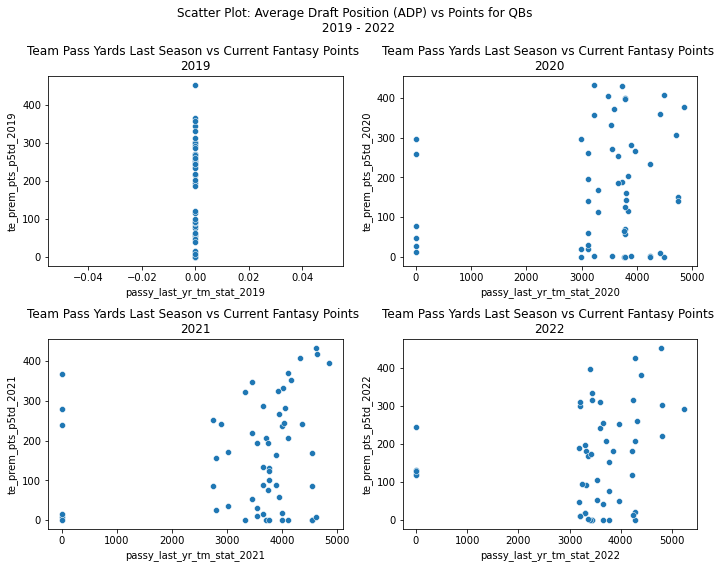

In [32]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Average Draft Position (ADP) vs Points for QBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'passy_last_yr_tm_stat_{year}', y=f'te_prem_pts_p5td_{year}',
                    data=qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Team Pass Yards Last Season vs Current Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

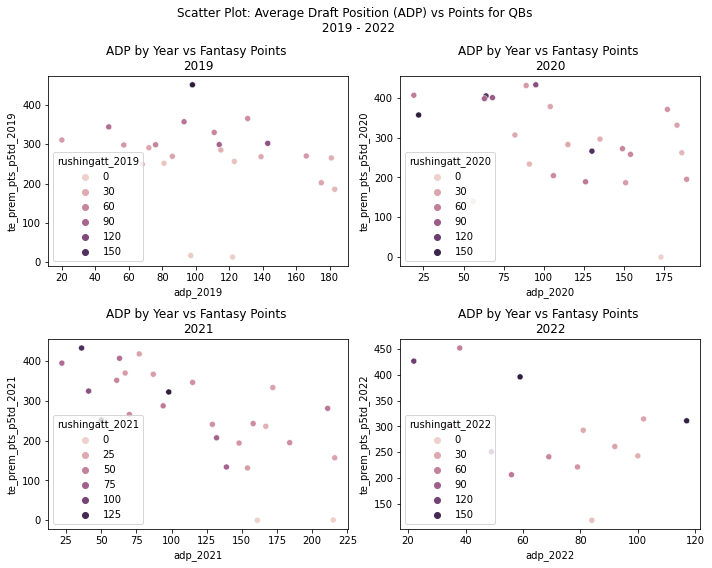

In [33]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Average Draft Position (ADP) vs Points for QBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'adp_{year}', y=f'te_prem_pts_p5td_{year}', \
                    hue = f'rushingatt_{year}', data=qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'ADP by Year vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

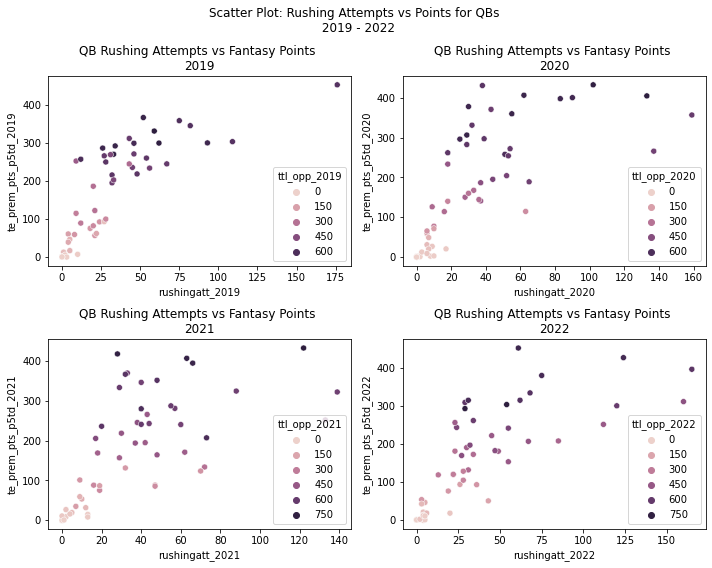

In [34]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Rushing Attempts vs Points for QBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'rushingatt_{year}', y=f'te_prem_pts_p5td_{year}', \
                    hue = f'ttl_opp_{year}', data=qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'QB Rushing Attempts vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

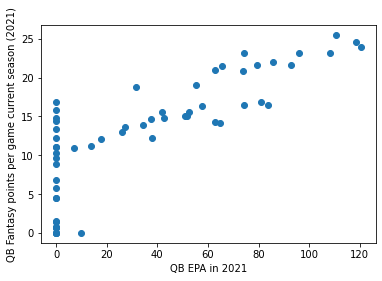

In [35]:
plt.scatter(qb_filtered['epa_total_2021'], qb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB EPA in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

Next: either more visualizations, or try to start modeling for QBs. Perhaps visualizations while transforming data if necessary.

# RB

### cleaning/filtering some data

In [36]:
rb_wide.head()

1std_2019  1std_2020  1std_2021  1std_2022  1std_2023  \
player_name                                                              
A.J. Dillon            NaN      358.0      375.0      334.0        0.0   
A.J. Ouellette       305.0        NaN        NaN        NaN        NaN   
A.J. Rose              NaN        NaN      332.0        NaN        NaN   
Aaron Jones          320.0      358.0      375.0      334.0        0.0   
Aaron Shampklin        NaN        NaN        NaN      310.0        NaN   

                 adp_2019  adp_2020  adp_2021  adp_2022  adp_2023  age_2019  \
player_name                                                                   
A.J. Dillon           NaN     129.0      82.0      46.0       0.0       NaN   
A.J. Ouellette        NaN       NaN       NaN       NaN       NaN       NaN   
A.J. Rose             NaN       NaN       NaN       NaN       NaN       NaN   
Aaron Jones          28.0      18.0       6.0      16.0       0.0      25.0   
Aaron Shampklin       NaN       NaN       NaN       NaN       NaN       NaN   

                 age_2020  age_2021  age_2022  age_2023  avg_per_catch_2019  \
player_name                                                                   
A.J. Dillon           NaN       NaN       NaN       NaN                 NaN   
A.J. Ouellette        NaN       NaN       NaN       NaN            0.000000   
A.J. Rose             NaN       NaN       NaN       NaN                 NaN   
Aaron Jones          26.0      27.0      28.0      29.0            9.673469   
Aaron Shampklin       NaN       NaN       NaN       NaN                 NaN   

                 avg_per_catch_2020  avg_per_catch_2021  avg_per_catch_2022  \
player_name                                                                   
A.J. Dillon                0.000000            0.000000            0.000000   
A.J. Ouellette                  NaN                 NaN                 NaN   
A.J. Rose                       NaN            0.000000                 NaN   
Aaron Jones                7.553191            7.519231            6.694915   
Aaron Shampklin                 NaN                 NaN            0.000000   

                 avg_per_catch_2023  avg_per_rush_2019  avg_per_rush_2020  \
player_name                                                                 
A.J. Dillon                     0.0                NaN           0.000000   
A.J. Ouellette                  NaN            0.00000                NaN   
A.J. Rose                       NaN                NaN                NaN   
Aaron Jones                     0.0            4.59322           5.492537   
Aaron Shampklin                 NaN                NaN                NaN   

                 avg_per_rush_2021  avg_per_rush_2022  avg_per_rush_2023  \
player_name                                                                
A.J. Dillon               0.000000           0.000000                0.0   
A.J. Ouellette                 NaN                NaN                NaN   
A.J. Rose                 0.000000                NaN                NaN   
Aaron Jones               4.672515           5.262911                0.0   
Aaron Shampklin                NaN           0.000000                NaN   

                 avg_per_tgt_2019  avg_per_tgt_2020  avg_per_tgt_2021  \
player_name                                                             
A.J. Dillon                   NaN          0.000000          0.000000   
A.J. Ouellette           0.000000               NaN               NaN   
A.J. Rose                     NaN               NaN          0.000000   
Aaron Jones              6.970588          5.634921          6.015385   
Aaron Shampklin               NaN               NaN               NaN   

                 avg_per_tgt_2022  avg_per_tgt_2023  avg_time_to_los_2019  \
player_name                                                                 
A.J. Dillon              0.000000               0.0                   NaN   
A.J. Ouellette      

In [37]:
rb_wide.shape

(392, 425)

In [38]:
rb_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 
    'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum()

te_prem_pts_p5td_2019    157
te_prem_pts_p5td_2020    181
te_prem_pts_p5td_2021    177
te_prem_pts_p5td_2022    194
dtype: int64

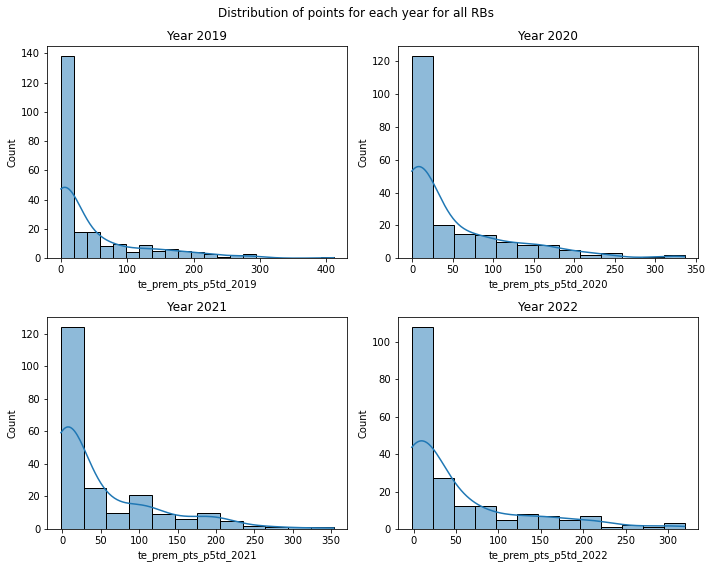

In [39]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Distribution of points for each year for all RBs')

# Iterate through each year and create the histogram in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(rb_wide[f'te_prem_pts_p5td_{year}'], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Year {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [40]:
# can we cut this data down to a relevant top percentile?
# utilizing nulls like we did with QBs, perhaps the top 50-60% can be kept

rb_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 
    'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].quantile([ .3, .4, .5, .6, .6667, .7,])

te_prem_pts_p5td_2019  te_prem_pts_p5td_2020  te_prem_pts_p5td_2021  \
0.3000                0.00000                 1.4000                1.22000   
0.4000                1.20000                 7.2000                5.76000   
0.5000                8.40000                15.7000               16.50000   
0.6000               22.78000                29.7000               33.00000   
0.6667               40.61638                48.4028               47.73476   
0.7000               47.84000                60.2000               59.44000   

        te_prem_pts_p5td_2022  
0.3000                1.54000  
0.4000                7.00000  
0.5000               17.30000  
0.6000               32.24000  
0.6667               43.76798  
0.7000               52.86000

In [41]:
# let's filter out QBs a bit further
# cut it about the top 3rd, or 66.7th percentile
# rb must register a season in the top 3rd of the league to be in final dataset

rb_filtered = rb_wide.loc[(rb_wide['te_prem_pts_p5td_2019'] >= 31.47 )| (rb_wide['te_prem_pts_p5td_2020'] >= 48.41) | \
                     (rb_wide['te_prem_pts_p5td_2021'] >= 48.32) |  (rb_wide['te_prem_pts_p5td_2022'] >= 43.9) ]

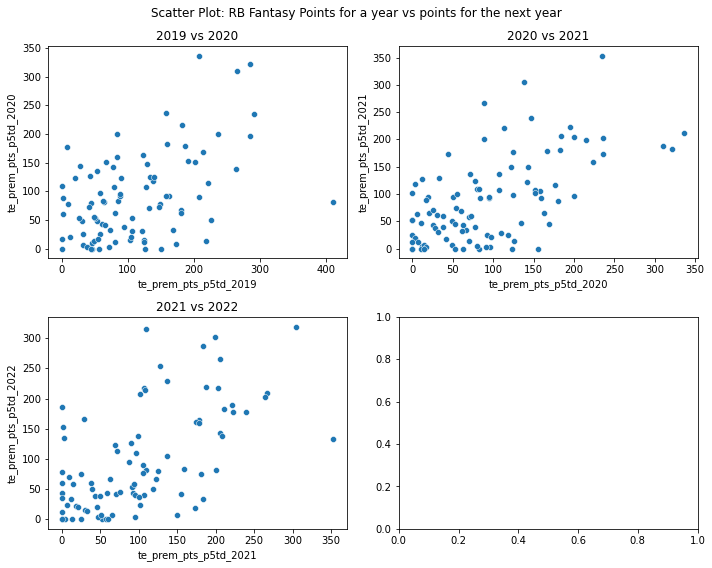

In [42]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: RB Fantasy Points for a year vs points for the next year')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

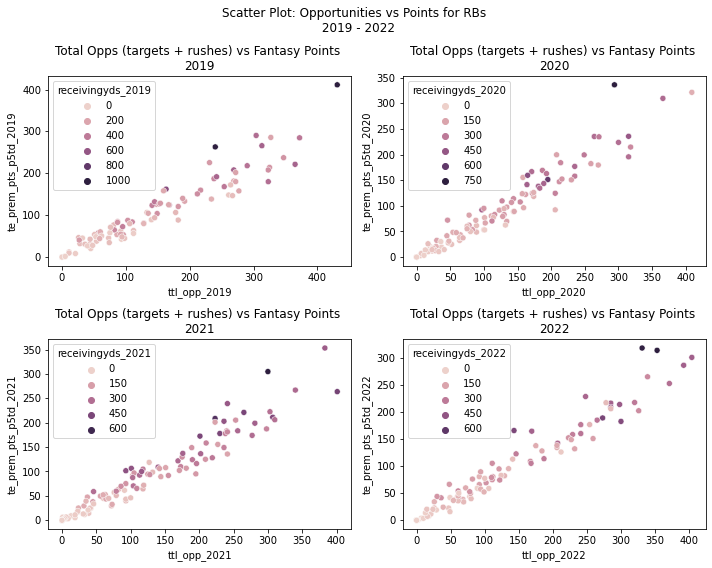

In [43]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Opportunities vs Points for RBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'ttl_opp_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'receivingyds_{year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Total Opps (targets + rushes) vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

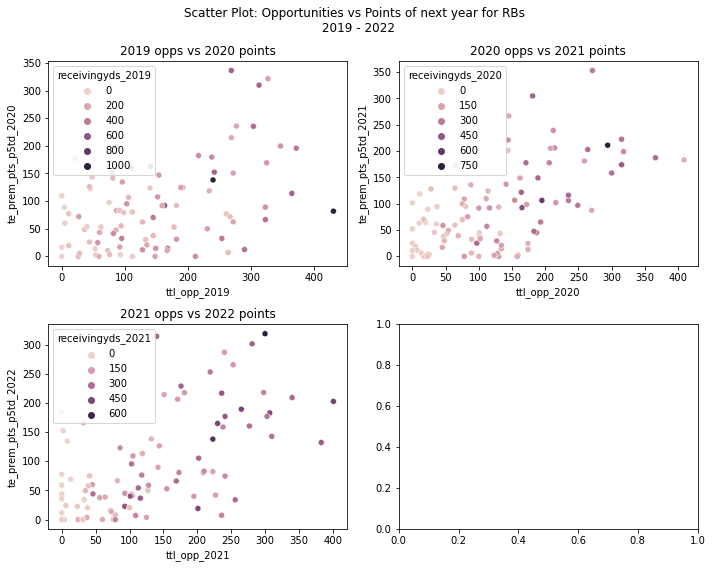

In [44]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Opportunities vs Points of next year for RBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'ttl_opp_{year}', y=f'te_prem_pts_p5td_{next_year}', hue = f'receivingyds_{year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} opps vs {next_year} points')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

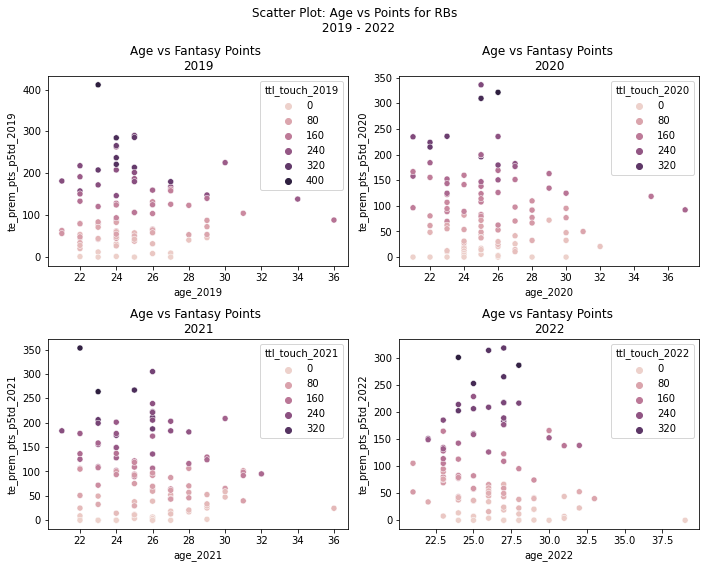

In [45]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Age vs Points for RBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'age_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'ttl_touch_{year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Age vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

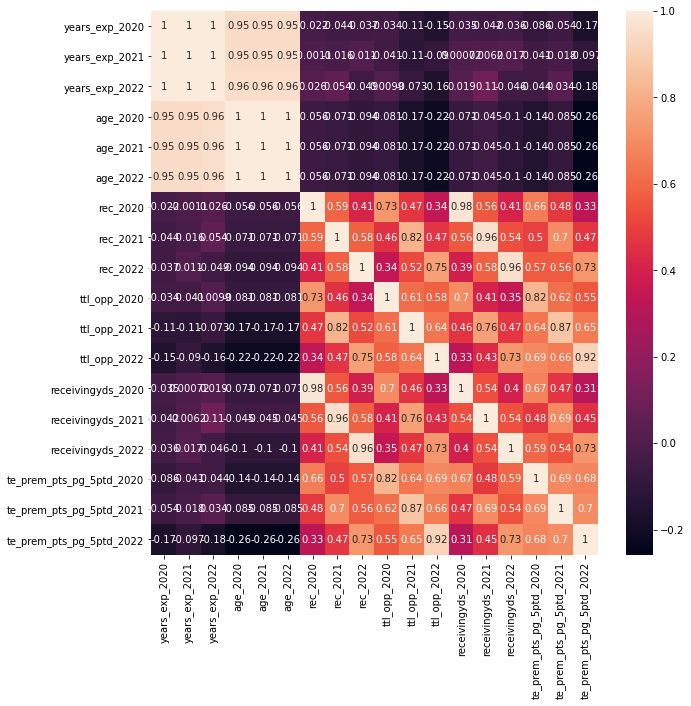

In [46]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(rb_filtered[['years_exp_2020', 'years_exp_2021', 'years_exp_2022',
                     'age_2020', 'age_2021', 'age_2022',
                   'rec_2020', 'rec_2021',
                   'rec_2022', 'ttl_opp_2020' , 'ttl_opp_2021', 
                   'ttl_opp_2022', 'receivingyds_2020', 'receivingyds_2021',
                     'receivingyds_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

Past year scoring has a high correlation (.75 - .8) with following years. Tll opportunities seem to more as well, and more than receptions. Age doesn't but perhaps that can change when filtering out a few more. Age seems to have more, though, than years experience.

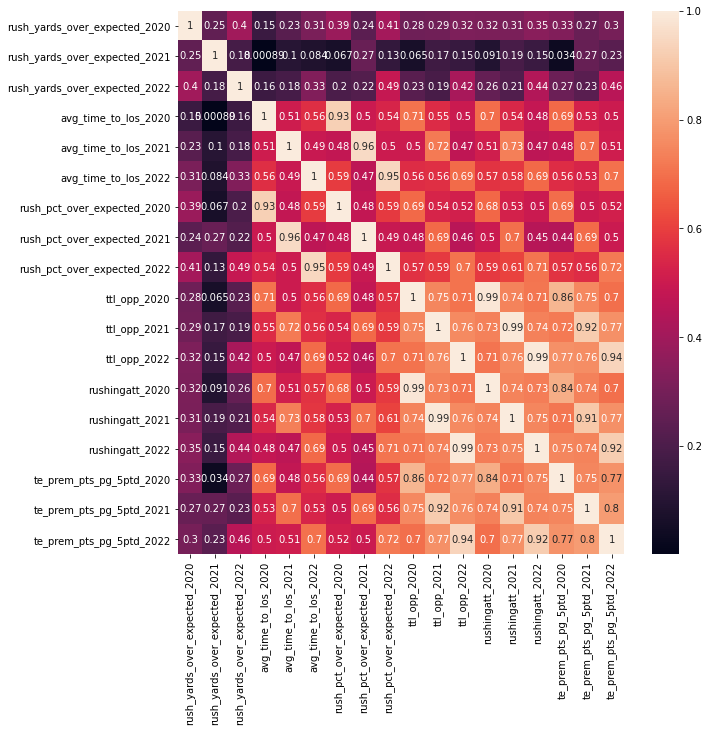

In [47]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(rb_wide[['rush_yards_over_expected_2020', 'rush_yards_over_expected_2021', 'rush_yards_over_expected_2022',
                     'avg_time_to_los_2020', 'avg_time_to_los_2021', 'avg_time_to_los_2022',
                   'rush_pct_over_expected_2020', 'rush_pct_over_expected_2021',
                   'rush_pct_over_expected_2022', 'ttl_opp_2020' , 'ttl_opp_2021', 
                   'ttl_opp_2022', 'rushingatt_2020', 'rushingatt_2021', 'rushingatt_2022',
                     'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

AVG_time_to_los and rush_pct over expected each have moderate correlations with points. We're going to use rush_pct_over_expected

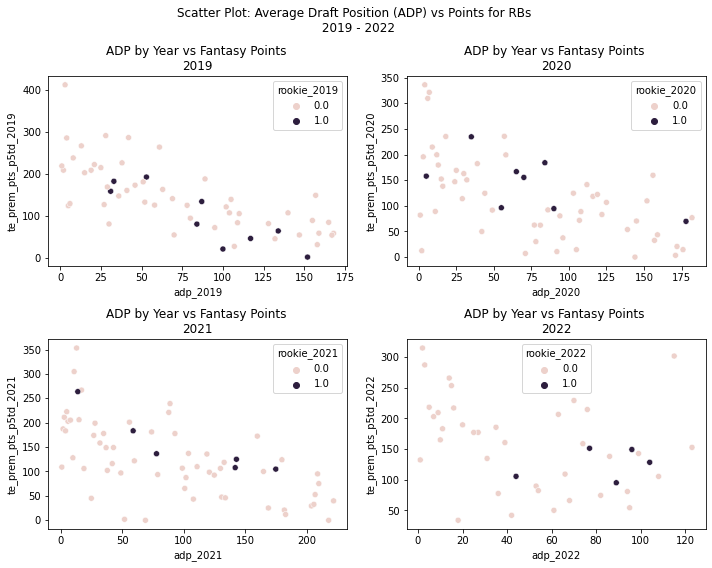

In [48]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Average Draft Position (ADP) vs Points for RBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'adp_{year}', y=f'te_prem_pts_p5td_{year}', \
                    hue = f'rookie_{year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'ADP by Year vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB HPPR Fantasy points in season(2021)')

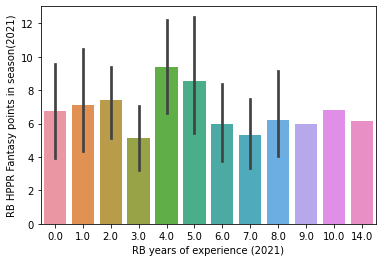

In [49]:
sns.barplot(rb_filtered['years_exp_2021'], rb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('RB years of experience (2021)')
plt.ylabel('RB HPPR Fantasy points in season(2021)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB HPPR Fantasy points in season(2020)')

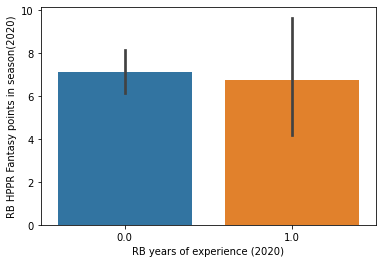

In [50]:
sns.barplot(rb_filtered['rookie_2021'], rb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('RB years of experience (2020)')
plt.ylabel('RB HPPR Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB HPPR Fantasy points in season(2022)')

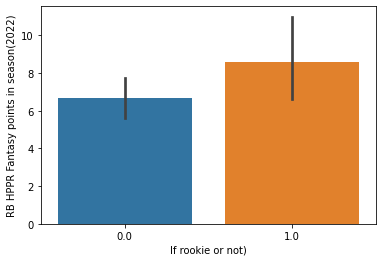

In [51]:
sns.barplot(rb_filtered['rookie_2022'], rb_filtered['te_prem_pts_pg_5ptd_2022'])
plt.xlabel('If rookie or not)')
plt.ylabel('RB HPPR Fantasy points in season(2022)')

### RBs Fantasy Performance and Next Gen Stats

Some columns that will have interest are:

    expected_rush_yards, avg_rush_yards, rush_yards_over_expected_per_att, rush_pct_over_expected_20, avg_time_to_los, efficiency
   

### WR

In [52]:
wr_wide.describe()

1std_2019   1std_2020   1std_2021   1std_2022  1std_2023    adp_2019  \
count  375.000000  332.000000  316.000000  328.000000       73.0   63.000000   
mean   300.720000  317.668675  314.186709  322.201220        0.0   86.523810   
std     92.084384  100.799996  104.651834   71.196646        0.0   51.024617   
min      0.000000    0.000000    0.000000    0.000000        0.0    9.000000   
25%    305.000000  322.000000  306.000000  300.000000        0.0   44.500000   
50%    317.000000  350.000000  332.000000  342.000000        0.0   82.000000   
75%    346.000000  366.000000  363.250000  352.000000        0.0  127.500000   
max    386.000000  397.000000  419.000000  408.000000        0.0  188.000000   

         adp_2020    adp_2021    adp_2022  adp_2023    age_2019    age_2020  \
count   63.000000   64.000000   43.000000      73.0  390.000000  390.000000   
mean    91.238095   99.656250   60.093023       0.0   23.910256   24.907692   
std     53.787729   60.243479   33.639414       0.0    3.204214    3.206146   
min      8.000000    7.000000    4.000000       0.0   18.000000   19.000000   
25%     46.500000   47.750000   31.500000       0.0   22.000000   23.000000   
50%     83.000000   91.000000   58.000000       0.0   23.000000   24.000000   
75%    132.500000  144.250000   89.000000       0.0   26.000000   27.000000   
max    195.000000  219.000000  114.000000       0.0   36.000000   37.000000   

         age_2021    age_2022    age_2023  aggressiveness_2019  \
count  390.000000  390.000000  390.000000                375.0   
mean    25.907692   26.907692   27.907692                  0.0   
std      3.206146    3.206146    3.206146                  0.0   
min     20.000000   21.000000   22.000000                  0.0   
25%     24.000000   25.000000   26.000000                  0.0   
50%     25.000000   26.000000   27.000000                  0.0   
75%     28.000000   29.000000   30.000000                  0.0   
max     38.000000   39.000000   40.000000                  0.0   

       aggressiveness_2020  aggressiveness_2021  aggressiveness_2022  \
count           332.000000                316.0                328.0   
mean              0.052801                  0.0                  0.0   
std               0.962088                  0.0                  0.0   
min               0.000000                  0.0                  0.0   
25%               0.000000                  0.0                  0.0   
50%               0.000000                  0.0                  0.0   
75%               0.000000                  0.0                  0.0   
max              17.530073                  0.0                  0.0   

       aggressiveness_2023  attempts_2019  attempts_2020  attempts_2021  \
count                 73.0          375.0     332.000000          316.0   
mean                   0.0            0.0       0.085843            0.0   
std                    0.0            0.0       1.564141            0.0   
min                    0.0            0.0       0.000000            0.0   
25%                    0.0            0.0       0.000000            0.0   
50%                    0.0            0.0       0.000000            0.0   
75%                    0.0            0.0       0.000000            0.0   
max                    0.0            0.0      28.500000            0.0   

       attempts_2022  attempts_2023  avg_air_distance_2019  \
count          328.0           73.0                  375.0   
mean             0.0            0.0                    0.0   
std              0.0            0.0                    0.0   
min              0.0            0.0                    0.0   
25%              0.0            0.0                    0.0   
50%              0.0            0.0                    0.0   
75%              0.0            0.0                    0.0   
max              0.0            0.0                    0.0   

       avg_air_distance_2020  avg_air_distance_2021  avg_air_distance_2022  \
count             

In [53]:
wr_wide.shape

(619, 505)

In [54]:
wr_wide[['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020', 'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_p5td_2022']].isna().sum()

te_prem_pts_pg_5ptd_2019    244
te_prem_pts_pg_5ptd_2020    287
te_prem_pts_pg_5ptd_2021    303
te_prem_pts_p5td_2022       291
dtype: int64

We can probably get rid of 1/3 to 50% of the top wrs, using a similar method as before. First, let's see the distribution of scoring for all WRs.

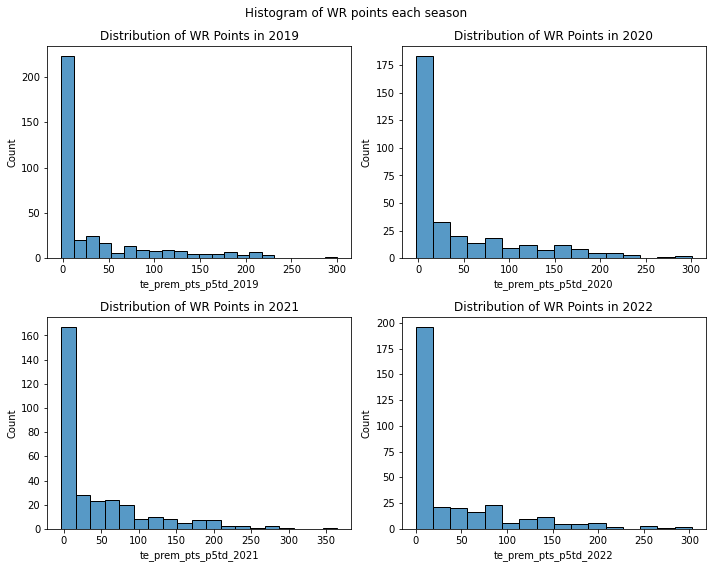

In [55]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Histogram of WR points each season')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(x=f'te_prem_pts_p5td_{year}',data= wr_wide, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of WR Points in {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [56]:
wr_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].quantile([.1, .2, .3, .4, .5, .6, .63, .6667, .7])



te_prem_pts_p5td_2019  te_prem_pts_p5td_2020  te_prem_pts_p5td_2021  \
0.1000                0.00000                0.00000                0.00000   
0.2000                0.00000                0.00000                0.00000   
0.3000                0.00000                0.00000                0.00000   
0.4000                0.00000                1.54000                3.60000   
0.5000                3.40000                8.50000               11.45000   
0.6000               12.58000               23.48000               28.00000   
0.6300               19.43400               30.23600               38.94500   
0.6667               30.00748               38.00331               47.21155   
0.7000               35.40000               50.38000               56.25000   

        te_prem_pts_p5td_2022  
0.1000                0.00000  
0.2000                0.00000  
0.3000                0.00000  
0.4000                0.80000  
0.5000                6.75000  
0.6000               20.06000  
0.6300               28.51300  
0.6667               40.11744  
0.7000               50.50800

Let's take the top 3rd -- they must have finished in the top 3rd at least one of these seasons.

In [57]:
wr_filtered = wr_wide.loc[(wr_wide['te_prem_pts_p5td_2019'] >= 27.45 )| (wr_wide['te_prem_pts_p5td_2020'] >= 37.90) | \
                     (wr_wide['te_prem_pts_p5td_2021'] >= 47.58) |  (wr_wide['te_prem_pts_p5td_2022'] >= 39.58) ]

print('nulls of wr_filtered now: ', 
      wr_filtered[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum(),
     'Shape of wr_filtered: ',
     wr_filtered.shape)

nulls of wr_filtered now:  te_prem_pts_p5td_2019    57
te_prem_pts_p5td_2020    35
te_prem_pts_p5td_2021    34
te_prem_pts_p5td_2022    47
dtype: int64 Shape of wr_filtered:  (209, 505)


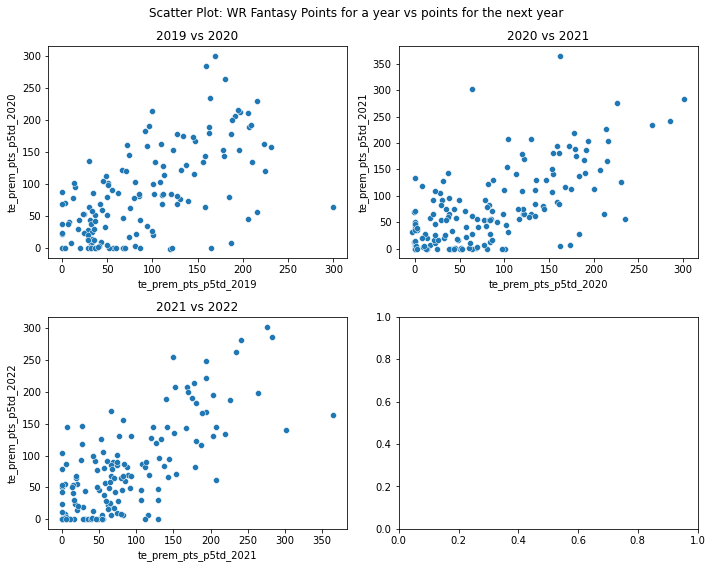

In [58]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: WR Fantasy Points for a year vs points for the next year')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data= wr_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [59]:
wr_filtered.head()

1std_2019  1std_2020  1std_2021  1std_2022  1std_2023  \
player_name                                                             
A.J. Brown          317.0      381.0      362.0      385.0        0.0   
A.J. Green          312.0      318.0      367.0      326.0        NaN   
Adam Humphries      317.0      381.0        0.0        NaN        NaN   
Adam Thielen        314.0      383.0      332.0      382.0        0.0   
Albert Wilson       315.0      345.0      325.0        NaN        NaN   

                adp_2019  adp_2020  adp_2021  adp_2022  adp_2023  age_2019  \
player_name                                                                  
A.J. Brown           NaN      46.0      26.0      28.0       0.0      22.0   
A.J. Green          66.0      73.0     186.0       NaN       NaN      31.0   
Adam Humphries       NaN       NaN       NaN       NaN       NaN      26.0   
Adam Thielen        24.0      31.0      54.0      71.0       0.0      29.0   
Albert Wilson        NaN       NaN       NaN       NaN       NaN      27.0   

                age_2020  age_2021  age_2022  age_2023  aggressiveness_2019  \
player_name                                                                   
A.J. Brown          23.0      24.0      25.0      26.0                  0.0   
A.J. Green          32.0      33.0      34.0      35.0                  0.0   
Adam Humphries      27.0      28.0      29.0      30.0                  0.0   
Adam Thielen        30.0      31.0      32.0      33.0                  0.0   
Albert Wilson       28.0      29.0      30.0      31.0                  0.0   

                aggressiveness_2020  aggressiveness_2021  aggressiveness_2022  \
player_name                                                                     
A.J. Brown                      0.0                  0.0                  0.0   
A.J. Green                      0.0                  0.0                  0.0   
Adam Humphries                  0.0                  0.0                  NaN   
Adam Thielen                    0.0                  0.0                  0.0   
Albert Wilson                   0.0                  0.0                  NaN   

                aggressiveness_2023  attempts_2019  attempts_2020  \
player_name                                                         
A.J. Brown                      0.0            0.0            0.0   
A.J. Green                      NaN            0.0            0.0   
Adam Humphries                  NaN            0.0            0.0   
Adam Thielen                    0.0            0.0            0.0   
Albert Wilson                   NaN            0.0            0.0   

                attempts_2021  attempts_2022  attempts_2023  \
player_name                                                   
A.J. Brown                0.0            0.0            0.0   
A.J. Green                0.0            0.0            NaN   
Adam Humphries            0.0            NaN            NaN   
Adam Thielen              0.0            0.0            0.0   
Albert Wilson             0.0            NaN            NaN   

                avg_air_distance_2019  avg_air_distance_2020  \
player_name                                                    
A.J. Brown                        0.0                    0.0   
A.J. Green                        0.0                    0.0   
Adam Humphries                    0.0                    0.0   
Adam Thielen                      0.0                    0.0   
Albert Wilson                     0.0                    0.0   

                avg_air_distance_2021  avg_air_distance_2022  \
player_name                                                    
A.J. Brown                        0.0                    0.0   
A.J. Green                        0.0                    0.0   
Adam Humphries                    0.0                    NaN   
Adam Thielen                      0.0                    0.0   
Albert Wilson                     0.0                    NaN   

           

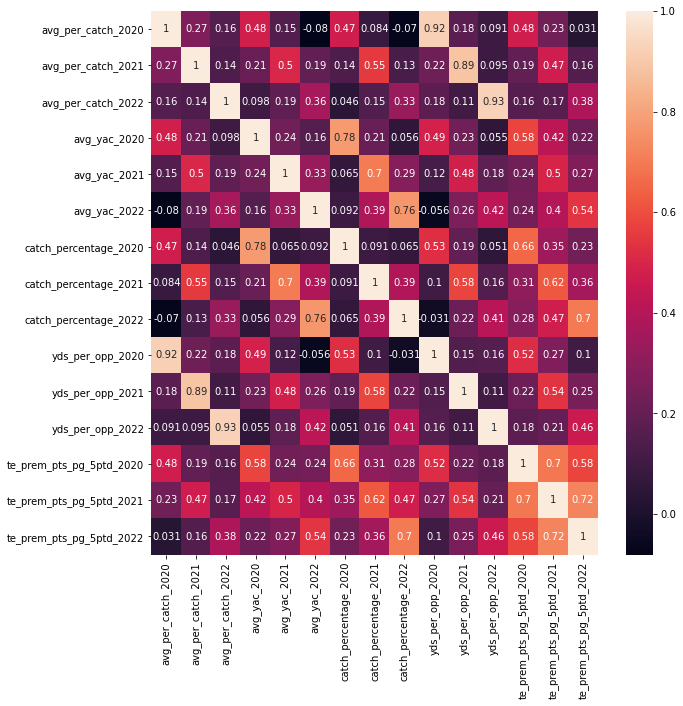

In [60]:
# let's look some possibly interesting figures for WRs
# many next gen stats

plt.figure(figsize = (10,10))

sns.heatmap(wr_filtered[['avg_per_catch_2020', 'avg_per_catch_2021', 'avg_per_catch_2022',
                     'avg_yac_2020', 'avg_yac_2021', 'avg_yac_2022',
                   'catch_percentage_2020', 'catch_percentage_2021',
                   'catch_percentage_2022', 'yds_per_opp_2020' , 'yds_per_opp_2021', 
                   'yds_per_opp_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

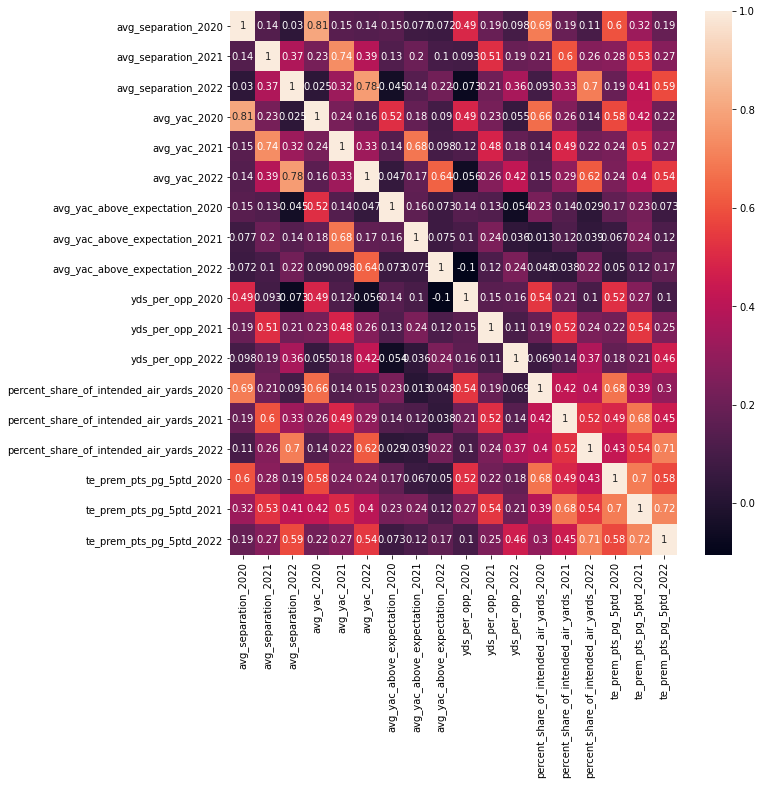

In [61]:
# let's look some possibly interesting figures for WRs
# many next gen stats

plt.figure(figsize = (10,10))

sns.heatmap(wr_filtered[['avg_separation_2020', 'avg_separation_2021', 'avg_separation_2022',
                     'avg_yac_2020', 'avg_yac_2021', 'avg_yac_2022',
                   'avg_yac_above_expectation_2020', 'avg_yac_above_expectation_2021',
                   'avg_yac_above_expectation_2022', 'yds_per_opp_2020' , 'yds_per_opp_2021', 
                   'yds_per_opp_2022', 'percent_share_of_intended_air_yards_2020', 
                  'percent_share_of_intended_air_yards_2021', 'percent_share_of_intended_air_yards_2022',
                         'te_prem_pts_pg_5ptd_2020', 'te_prem_pts_pg_5ptd_2021',
                         'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()


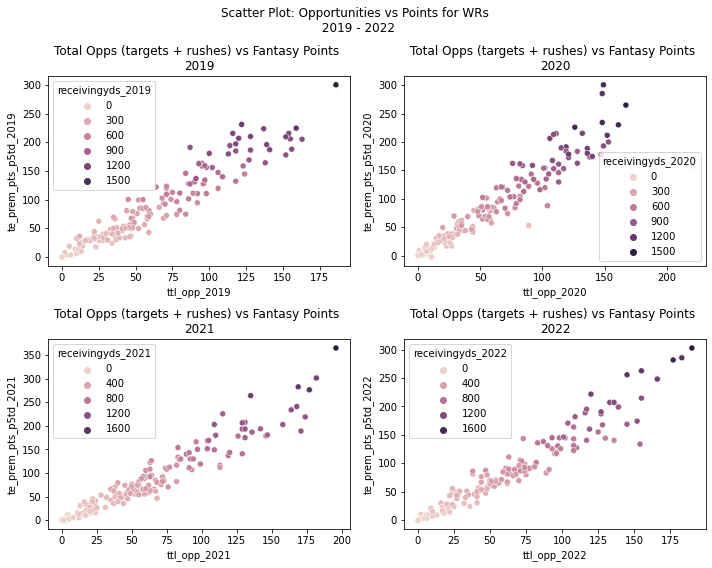

In [62]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Opportunities vs Points for WRs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'ttl_opp_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'receivingyds_{year}', data=wr_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Total Opps (targets + rushes) vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

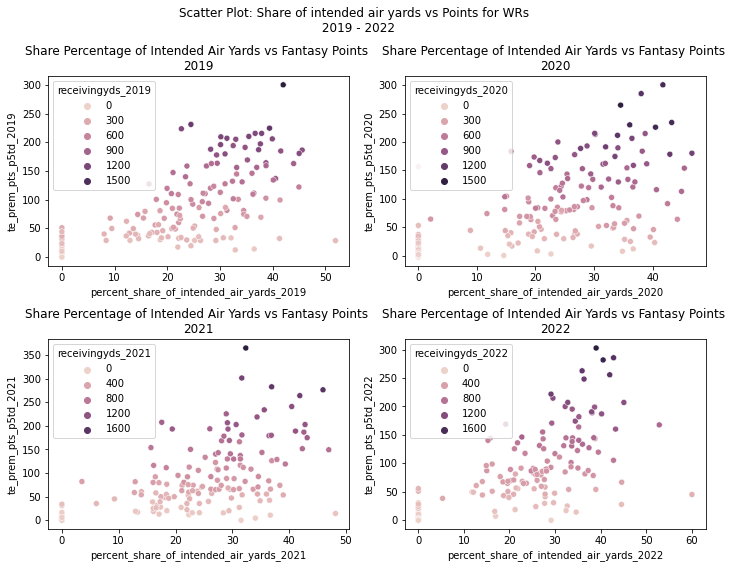

In [63]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Share of intended air yards vs Points for WRs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'percent_share_of_intended_air_yards_{year}', y=f'te_prem_pts_p5td_{year}', \
                    hue = f'receivingyds_{year}', data=wr_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Share Percentage of Intended Air Yards vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

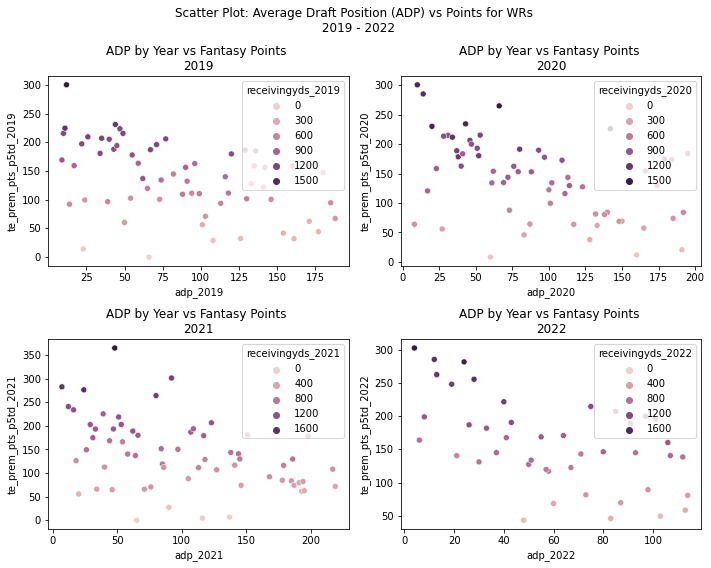

In [64]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Average Draft Position (ADP) vs Points for WRs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'adp_{year}', y=f'te_prem_pts_p5td_{year}', \
                    hue = f'receivingyds_{year}', data=wr_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'ADP by Year vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Text(0, 0.5, 'WR Fantasy points in season(2021)')

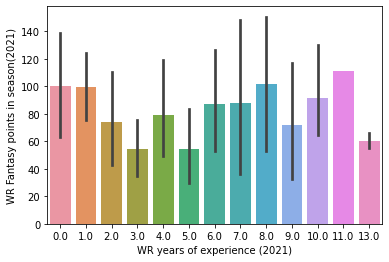

In [65]:
sns.barplot( data = wr_filtered, x = 'years_exp_2021', y = 'te_prem_pts_p5td_2021')
plt.xlabel('WR years of experience (2021)')
plt.ylabel('WR Fantasy points in season(2021)')

Text(0, 0.5, 'WR Fantasy points in season(2022)')

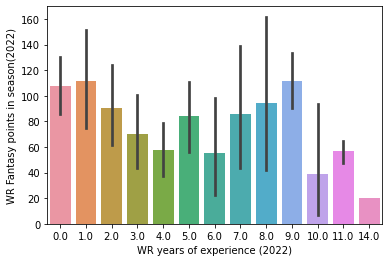

In [66]:
sns.barplot( data = wr_filtered, x = 'years_exp_2022', y = 'te_prem_pts_p5td_2022')
plt.xlabel('WR years of experience (2022)')
plt.ylabel('WR Fantasy points in season(2022)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy Average total points in season(2022)')

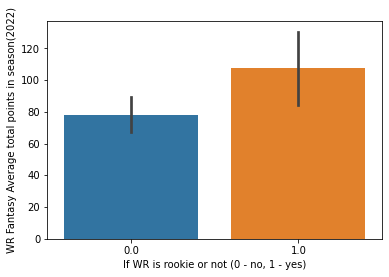

In [67]:
sns.barplot(wr_filtered['rookie_2022'], wr_filtered['te_prem_pts_p5td_2022'] )
plt.xlabel('If WR is rookie or not (0 - no, 1 - yes)')
plt.ylabel('WR Fantasy Average total points in season(2022)')

### TE

In [68]:
te_wide.head()

1std_2019  1std_2020  1std_2021  1std_2022  1std_2023  \
player_name                                                                 
A.J. Derby              347.0        NaN        NaN        NaN        NaN   
Adam Shaheen            297.0      345.0      325.0      342.0        NaN   
Adam Trautman             NaN      367.0      307.0      305.0        NaN   
Albert Okwuegbunam        NaN      308.0      331.0      300.0        NaN   
Alex Ellis                NaN        NaN      367.0        NaN        NaN   

                    adp_2019  adp_2020  adp_2021  adp_2022  adp_2023  \
player_name                                                            
A.J. Derby               NaN       NaN       NaN       NaN       NaN   
Adam Shaheen             NaN       NaN       NaN       NaN       NaN   
Adam Trautman            NaN       NaN     173.0       NaN       NaN   
Albert Okwuegbunam       NaN       NaN       NaN       NaN       NaN   
Alex Ellis               NaN       NaN       NaN       NaN       NaN   

                    age_2019  age_2020  age_2021  age_2022  age_2023  \
player_name                                                            
A.J. Derby               NaN       NaN       NaN       NaN       NaN   
Adam Shaheen            25.0      26.0      27.0      28.0      29.0   
Adam Trautman           22.0      23.0      24.0      25.0      26.0   
Albert Okwuegbunam      21.0      22.0      23.0      24.0      25.0   
Alex Ellis               NaN       NaN       NaN       NaN       NaN   

                    avg_cushion_2019  avg_cushion_2020  avg_cushion_2021  \
player_name                                                                
A.J. Derby                       0.0               NaN               NaN   
Adam Shaheen                     0.0          0.000000          3.196667   
Adam Trautman                    NaN          0.000000          6.032467   
Albert Okwuegbunam               NaN          7.725667          6.296250   
Alex Ellis                       NaN               NaN          0.000000   

                    avg_cushion_2022  avg_cushion_2023  avg_expected_yac_2019  \
player_name                                                                     
A.J. Derby                       NaN               NaN                    0.0   
Adam Shaheen                  0.0000               NaN                    0.0   
Adam Trautman                 0.0000               NaN                    NaN   
Albert Okwuegbunam            4.5385               NaN                    NaN   
Alex Ellis                       NaN               NaN                    NaN   

                    avg_expected_yac_2020  avg_expected_yac_2021  \
player_name                                                        
A.J. Derby                            NaN                    NaN   
Adam Shaheen                     0.000000               2.719246   
Adam Trautman                    0.000000               4.545758   
Albert Okwuegbunam               7.474475               4.449491   
Alex Ellis                            NaN               0.000000   

                    avg_expected_yac_2022  avg_expected_yac_2023  \
player_name                                                        
A.J. Derby                            NaN                    NaN   
Adam Shaheen                     0.000000                    NaN   
Adam Trautman                    0.000000                    NaN   
Albert Okwuegbunam               5.131349                    NaN   
Alex Ellis                            NaN                    NaN   

                    avg_intended_air_yards_2019  avg_intended_air_yards_2020  \
player_name                                                                    
A.J. Derby                                  0.0                          NaN   
Adam Shaheen                                0.0                     0.000000   
Adam Trautman                               NaN                     0.000000   
Albert Okwuegbu

In [69]:
te_wide.shape

(332, 480)

In [70]:
te_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum()

te_prem_pts_p5td_2019    139
te_prem_pts_p5td_2020    155
te_prem_pts_p5td_2021    144
te_prem_pts_p5td_2022    167
dtype: int64

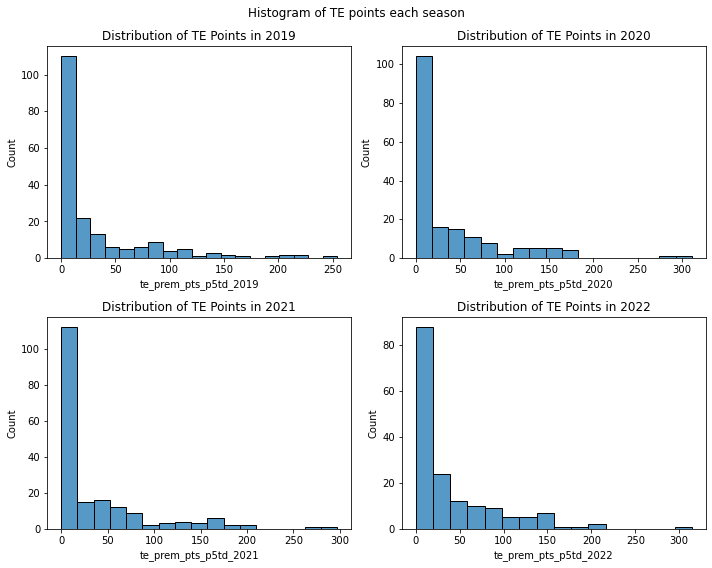

In [71]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Histogram of TE points each season')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(x=f'te_prem_pts_p5td_{year}',data= te_wide, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of TE Points in {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [72]:
# can we cut this data down to a relevant top percentile?

te_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 
    'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].quantile([ .3, .4, .5, .6, .67,.7, .75, .8])

te_prem_pts_p5td_2019  te_prem_pts_p5td_2020  te_prem_pts_p5td_2021  \
0.30                  0.000                   0.00                  0.000   
0.40                  0.000                   1.60                  1.600   
0.50                  3.300                   7.30                  6.450   
0.60                 15.820                  20.58                 18.700   
0.67                 23.184                  31.82                 32.861   
0.70                 30.020                  38.74                 38.460   
0.75                 39.300                  52.30                 50.525   
0.80                 61.480                  65.14                 61.980   

      te_prem_pts_p5td_2022  
0.30                   0.00  
0.40                   5.26  
0.50                  14.00  
0.60                  27.40  
0.67                  37.34  
0.70                  40.86  
0.75                  56.20  
0.80                  74.48

In [73]:
# to stay consistent, let's make the cutoff at top 3rd again

# let's filter out QBs a bit further

te_filtered = te_wide.loc[(te_wide['te_prem_pts_p5td_2019'] >= 19.47 )| (te_wide['te_prem_pts_p5td_2020'] >= 31.49) | \
                     (te_wide['te_prem_pts_p5td_2021'] >= 32.6) |  (te_wide['te_prem_pts_p5td_2022'] >= 37.2) ]


print('nulls of te_filtered now: ', 
      te_filtered[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum(),
     'Shape of te_filtered: ',
    te_filtered.shape)


nulls of te_filtered now:  te_prem_pts_p5td_2019    29
te_prem_pts_p5td_2020    27
te_prem_pts_p5td_2021    24
te_prem_pts_p5td_2022    31
dtype: int64 Shape of te_filtered:  (113, 480)


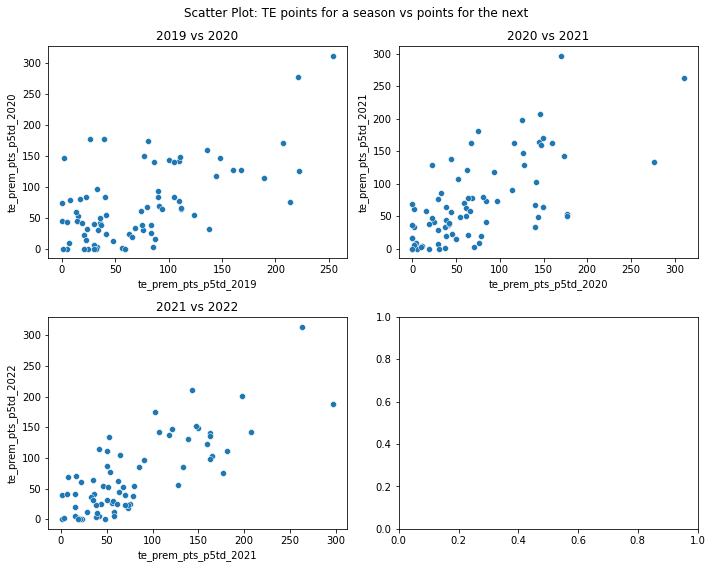

In [74]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: TE points for a season vs points for the next')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data= te_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

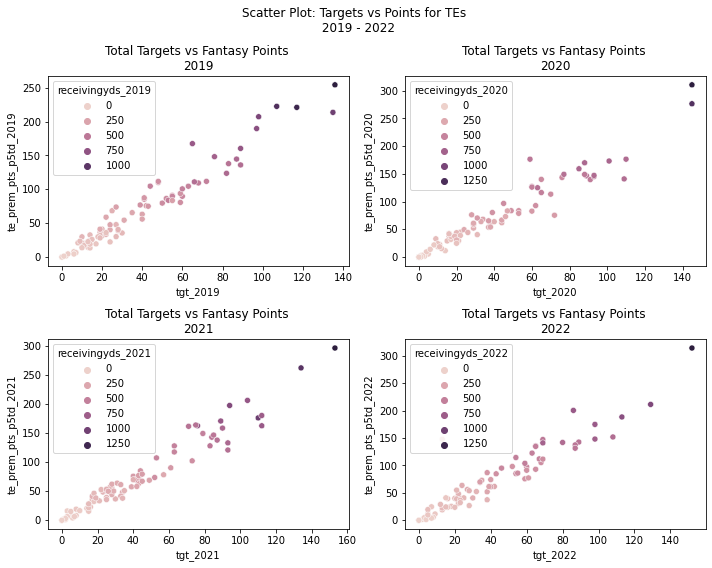

In [75]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Targets vs Points for TEs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'tgt_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'receivingyds_{year}', data=te_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Total Targets vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

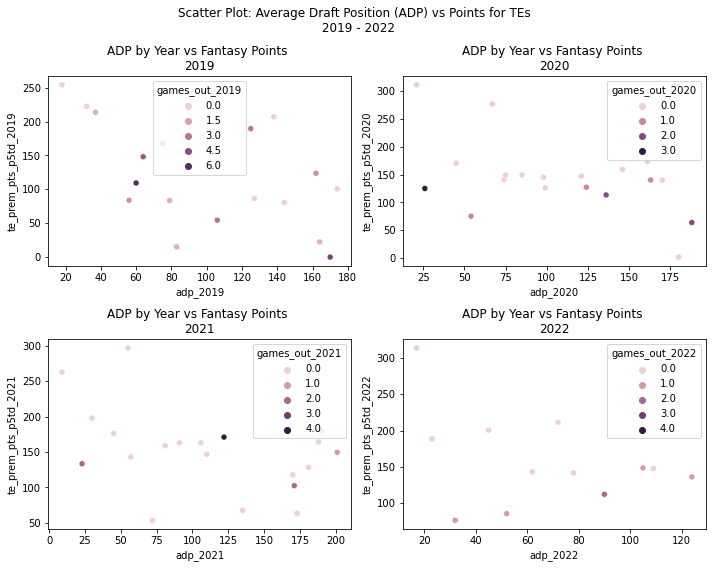

In [79]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Average Draft Position (ADP) vs Points for TEs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'adp_{year}', y=f'te_prem_pts_p5td_{year}', \
                    hue = f'games_out_{year}', data=te_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'ADP by Year vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

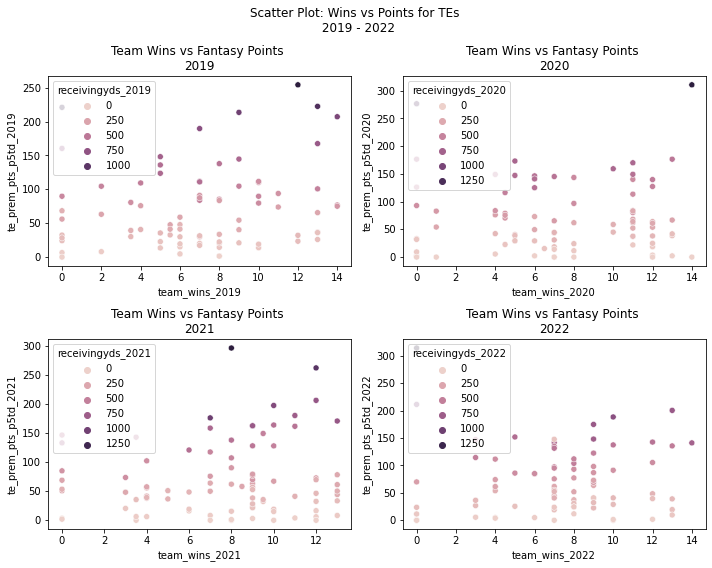

In [77]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Wins vs Points for TEs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'team_wins_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'receivingyds_{year}', data=te_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Team Wins vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [78]:
### Saving DFs to do initial modeling on

qb_filtered.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide_filtered.csv")
rb_filtered.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide_filtered.csv")
wr_filtered.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide_filtered.csv")
te_filtered.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide_filtered.csv")